# Sarah A. Thomas
# Project 6 - Thera Bank

__Description__ (copied from assignment)

__Background & Context__

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

You need to identify the best possible model that will give the required performance

__Objective__

1. Explore and visualize the dataset.
2. Build a classification model to predict if the customer is going to churn or not
3. Optimize the model using appropriate techniques
4. Generate a set of insights and recommendations that will help the bank

__Data Dictionary:__

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
* Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
* Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
* Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

# 1 - Load Packages and Read in the Dataset

In [2]:
# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Import time to check the training time
import time
import datetime

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# to make Python code more structured
%load_ext nb_black

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Remove limit from displayed columns and rows.
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [3]:
# load the data into pandas dataframe
bank = pd.read_csv("BankChurners.csv")

<IPython.core.display.Javascript object>

# 2 - Data Preprocessing

## 2.1 - Check the first and last 10 rows of the dataset and random 10 rows

In [4]:
bank.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.000,1247,2763.000,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,NaN,Married,$120K +,Gold,46,6,1,3,34516.000,2264,32252.000,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,0,High School,NaN,$60K - $80K,Silver,27,2,2,2,29081.000,1396,27685.000,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.000,2517,19835.000,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.000,1677,9979.000,1.524,1441,32,0.882,0.144


<IPython.core.display.Javascript object>

In [5]:
bank.tail(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10117,712503408,Existing Customer,57,M,2,Graduate,Married,$80K - $120K,Blue,40,6,3,4,17925.000,1909,16016.000,0.712,17498,111,0.820,0.106
10118,713755458,Attrited Customer,50,M,1,NaN,NaN,$80K - $120K,Blue,36,6,3,4,9959.000,952,9007.000,0.825,10310,63,1.100,0.096
10119,716893683,Attrited Customer,55,F,3,Uneducated,Single,abc,Blue,47,4,3,3,14657.000,2517,12140.000,0.166,6009,53,0.514,0.172
10120,710841183,Existing Customer,54,M,1,High School,Single,$60K - $80K,Blue,34,5,2,0,13940.000,2109,11831.000,0.660,15577,114,0.754,0.151
10121,713899383,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,50,4,1,4,3688.000,606,3082.000,0.570,14596,120,0.791,0.164
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


<IPython.core.display.Javascript object>

In [6]:
np.random.seed(1)
bank.sample(n=10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6498,712389108,Existing Customer,43,F,2,Graduate,Married,Less than $40K,Blue,36,6,3,2,2570.000,2107,463.000,0.651,4058,83,0.766,0.820
9013,718388733,Existing Customer,38,F,1,College,NaN,Less than $40K,Blue,32,2,3,3,2609.000,1259,1350.000,0.871,8677,96,0.627,0.483
2053,710109633,Existing Customer,39,M,2,College,Married,$60K - $80K,Blue,31,6,3,2,9871.000,1061,8810.000,0.545,1683,34,0.478,0.107
3211,717331758,Existing Customer,44,M,4,Graduate,Married,$120K +,Blue,32,6,3,4,34516.000,2517,31999.000,0.765,4228,83,0.596,0.073
5559,709460883,Attrited Customer,38,F,2,Doctorate,Married,Less than $40K,Blue,28,5,2,4,1614.000,0,1614.000,0.609,2437,46,0.438,0.000
6106,789105183,Existing Customer,54,M,3,Post-Graduate,Single,$80K - $120K,Silver,42,3,1,2,34516.000,2488,32028.000,0.552,4401,87,0.776,0.072
4150,771342183,Attrited Customer,53,F,3,Graduate,Single,$40K - $60K,Blue,40,6,3,2,1625.000,0,1625.000,0.689,2314,43,0.433,0.000
2205,708174708,Existing Customer,38,M,4,Graduate,Married,$40K - $60K,Blue,27,6,2,4,5535.000,1276,4259.000,0.636,1764,38,0.900,0.231
4145,718076733,Existing Customer,43,M,1,Graduate,Single,$60K - $80K,Silver,31,4,3,3,25824.000,1170,24654.000,0.684,3101,73,0.780,0.045
5324,821889858,Attrited Customer,50,F,1,Doctorate,Single,abc,Blue,46,6,4,3,1970.000,1477,493.000,0.662,2493,44,0.571,0.750


<IPython.core.display.Javascript object>

## 2.2 - Check the shape of the data

In [7]:
bank.shape

(10127, 21)

<IPython.core.display.Javascript object>

## 2.3 - Check the datatypes and rows counts for each column

In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<IPython.core.display.Javascript object>

__Observations:__
* After checking for duplicates, will drop CLIENTNUM since it does not provide any relevant information.
* The following have null values that need to be dealt with: Education_Level, Marital_Status.
* The following need to be converted to categorical variables: Attrition_Flag, Gender, Education_Level, Marital_Status, Income_Category, Card_Category.

## 2.4 - Check for duplicates and drop CLIENTNUM

In [9]:
bank.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [10]:
# Used CLIENTNUM to make sure there were no duplicate records
# Since there are no duplicate records, I can now drop CLIENTNUM
bank.drop(["CLIENTNUM"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [11]:
## 2.5 - Check values for soon-to-be categorical variables to ensure nothing needs correction

<IPython.core.display.Javascript object>

In [12]:
bank["Attrition_Flag"].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

<IPython.core.display.Javascript object>

In [14]:
bank["Gender"].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

<IPython.core.display.Javascript object>

In [15]:
bank["Education_Level"].value_counts()

Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

<IPython.core.display.Javascript object>

In [16]:
bank["Marital_Status"].value_counts()

Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64

<IPython.core.display.Javascript object>

In [17]:
bank["Income_Category"].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64

<IPython.core.display.Javascript object>

In [18]:
# abc seems to be filler for missing values - will replace with "missing"
bank["Income_Category"] = np.where(
    (bank.Income_Category == "abc"), "missing", bank.Income_Category
)
bank["Income_Category"].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
missing           1112
$120K +            727
Name: Income_Category, dtype: int64

<IPython.core.display.Javascript object>

In [19]:
bank["Card_Category"].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

<IPython.core.display.Javascript object>

## 2.5 - Convert Categoricals

In [21]:
bank["Attrition_Flag"] = bank["Attrition_Flag"].astype("category")
bank["Gender"] = bank["Gender"].astype("category")
bank["Education_Level"] = bank["Education_Level"].astype("category")
bank["Marital_Status"] = bank["Marital_Status"].astype("category")
bank["Income_Category"] = bank["Income_Category"].astype("category")
bank["Card_Category"] = bank["Card_Category"].astype("category")

<IPython.core.display.Javascript object>

# 3 - EDA

## 3.1 - Explore Summary of Data

In [23]:
bank.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Attrition_Flag,10127,2,Existing Customer,8500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Age,10127.000,NaN,NaN,NaN,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Gender,10127,2,F,5358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_count,10127.000,NaN,NaN,NaN,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Education_Level,8608,6,Graduate,3128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,9378,3,Married,4687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income_Category,10127,6,Less than $40K,3561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Card_Category,10127,4,Blue,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_on_book,10127.000,NaN,NaN,NaN,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,NaN,NaN,NaN,3.813,1.554,1.000,3.000,4.000,5.000,6.000


<IPython.core.display.Javascript object>

__Observations:__
* Attrition_Flag: Most are existing customers.
* Customer_Age: Average age is approx. 46 (median - 46, min - 26, max - 73).
* Gender: Most customers are female.
* Dependent_count: Average is approx. 2 (median - 2, min - 0, max - 5).
* Education_Level: Most customers hold a Graduate degree.
* Marital_Status: Most customers are married.
* Income_Category: Most customers make less than \\$40,000.
* Card_Category: Most customers are in the Blue card category.
* Months_on_book: The average is 36 months in relationship with bank (median - 36, min - 13, max - 56).
* Total_Relationship_Count: Customers on average have approx. 4 products with bank (median - 4, min - 1, max - 6).
* Months_Inactive_12_mon: On average, number of months inactive in the past year is approx. 2 (median - 2, min - 0, max - 6).
* Contacts_Count_12_mon: Average number of contacts with bank is approx. 2 (median - 2, min - 0, max - 6).
* Credit_Limit: Average credit limit is \\$8631.95 (median - 4549.00, min - 1438.30, max - 34516.00)
* Total_Revolving_Bal: Average revolving balance is \\$1162.81 (median - 1276.00, min - 0, max - 2517.00)
* Avg_Open_To_Buy: Average amount left on the credit card to use is \\$7469.14 (median - 3474.00, min - 3.00, max - 34516.00)
* Total_Amt_Chng_Q4_Q1: Average is 0.76 (median - 0.74, min - 0, max - 3.40)
* Total_Trans_Amt: Average total transaction amount is \\$4404.09 (median - 3899.00, min - 510.00, max - 18.484.00)
* Total_Trans_Ct: Average total transaction count is 64.86 (median - 67, min - 10, max - 139)
* Total_Ct_Chng_Q4_Q1: Average is 0.71 (median - 0.70, min - 0, max - 3.71)
* Avg_Utilization_Ratio: Average ratio is 0.28 (median - 0.18, min - 0, max - 1.00)

## 3.2 - Univariate Analysis

In [24]:
# Function copied from prior case study:
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2)  # setting the font scale for seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid=2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="red"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="g", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### 3.2.1 - Customer_Age

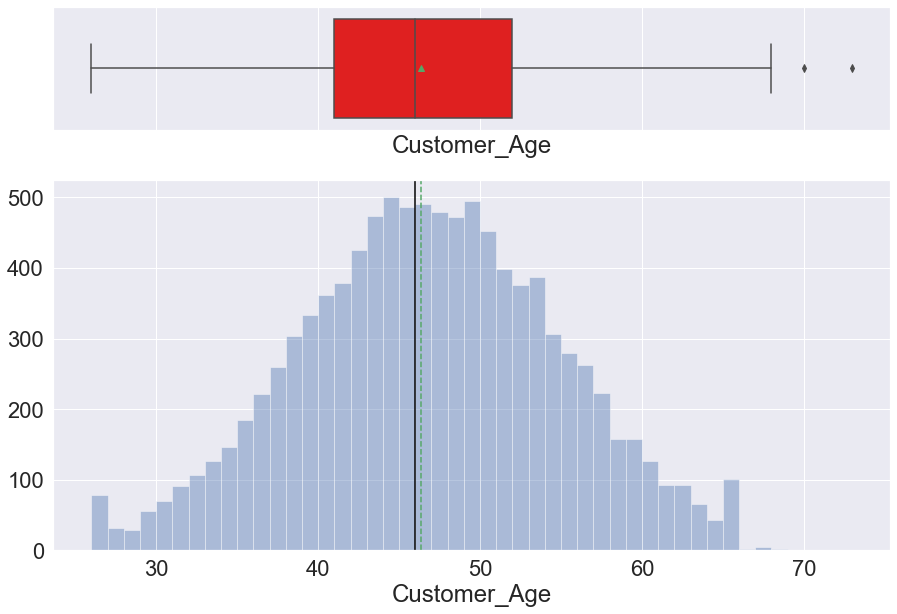

<IPython.core.display.Javascript object>

In [25]:
histogram_boxplot(bank["Customer_Age"])

* There are outliers so distribution is slightly right-skewed.

### 3.2.2 - Dependent_count

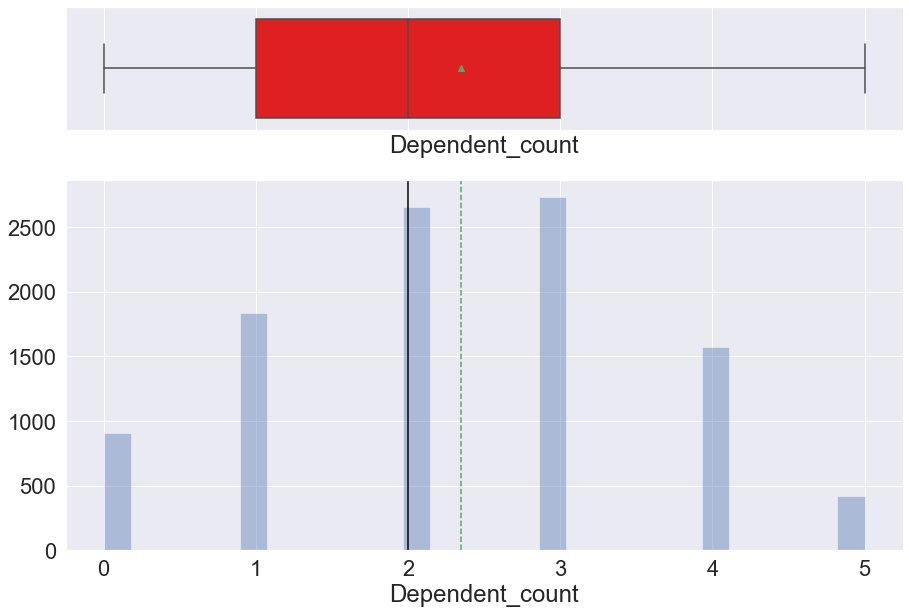

<IPython.core.display.Javascript object>

In [27]:
histogram_boxplot(bank["Dependent_count"])

* Distribution is symmetrical.

### 3.2.3 - Months_on_book

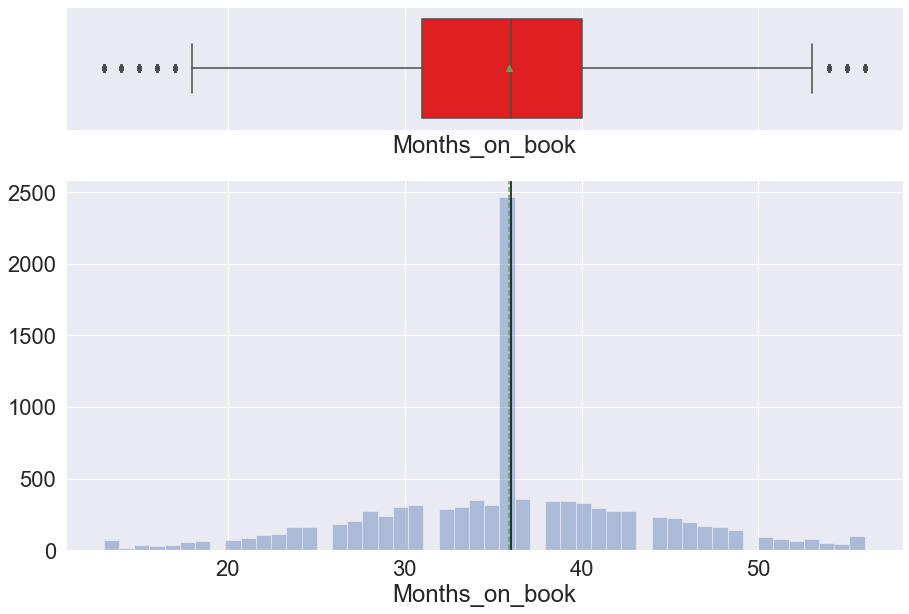

<IPython.core.display.Javascript object>

In [29]:
histogram_boxplot(bank["Months_on_book"])

* There are outliers on either side.

### 3.2.4 - Total_Relationship_Count

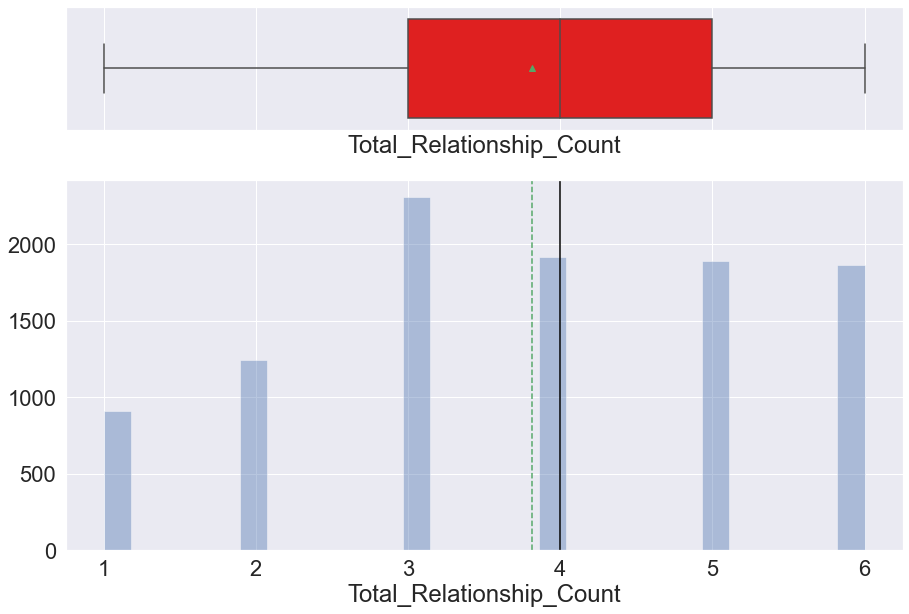

<IPython.core.display.Javascript object>

In [31]:
histogram_boxplot(bank["Total_Relationship_Count"])

* Can confirm above numbers: customers on average have approx. 4 products with bank (median - 4, min - 1, max - 6).

### 3.2.5 - Months_Inactive_12_mon

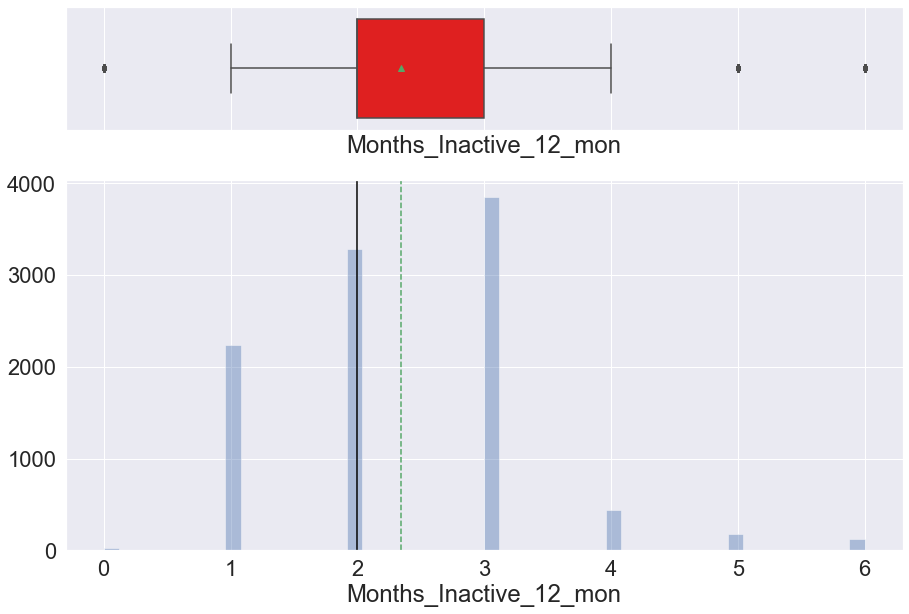

<IPython.core.display.Javascript object>

In [32]:
histogram_boxplot(bank["Months_Inactive_12_mon"])

* There are outliers on either side.

### 3.2.6 - Contacts_Count_12_mon

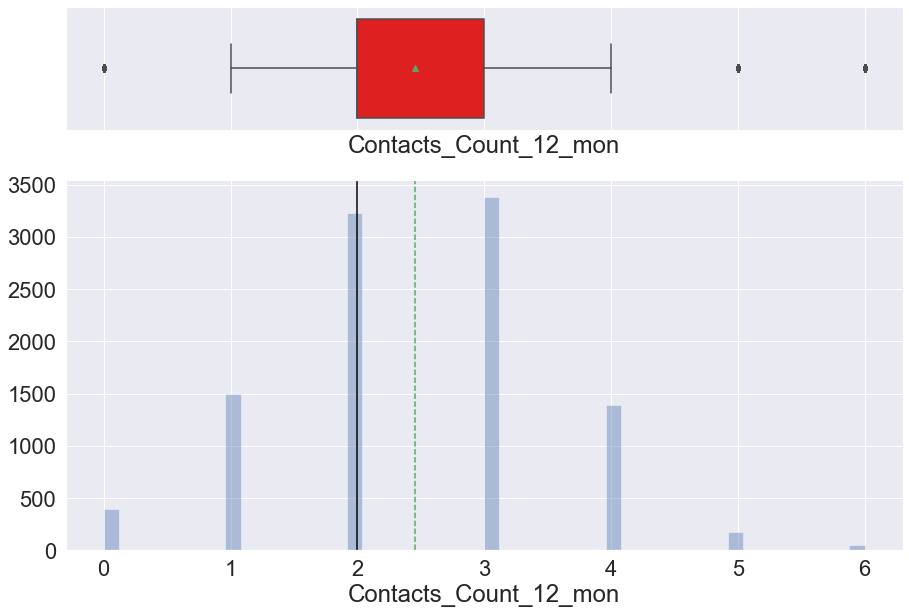

<IPython.core.display.Javascript object>

In [35]:
histogram_boxplot(bank["Contacts_Count_12_mon"])

* There are outliers on either side.

### 3.2.7 - Credit_Limit

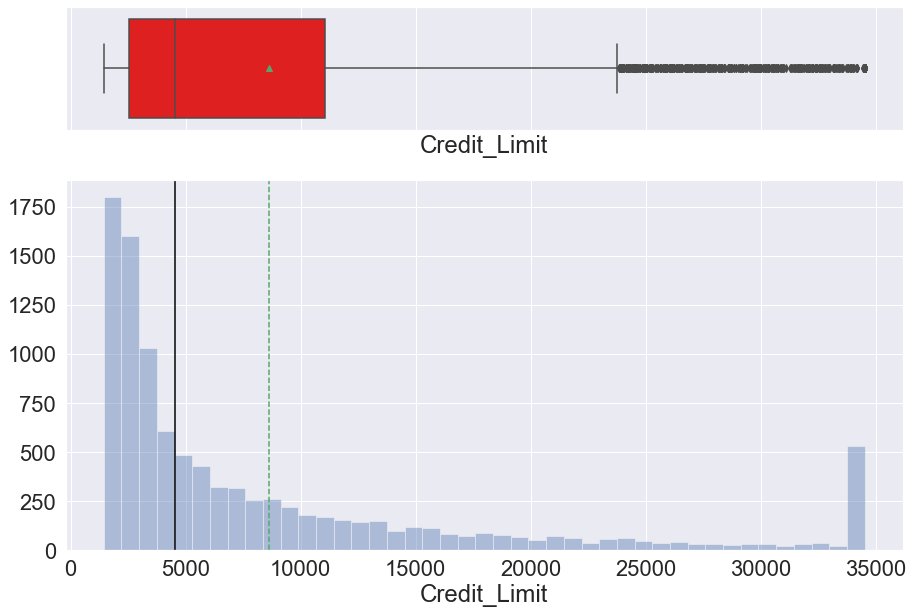

<IPython.core.display.Javascript object>

In [37]:
histogram_boxplot(bank["Credit_Limit"])

* Distribution is right-skewed with outliers on the right.

### 3.2.8 - Total_Revolving_Bal

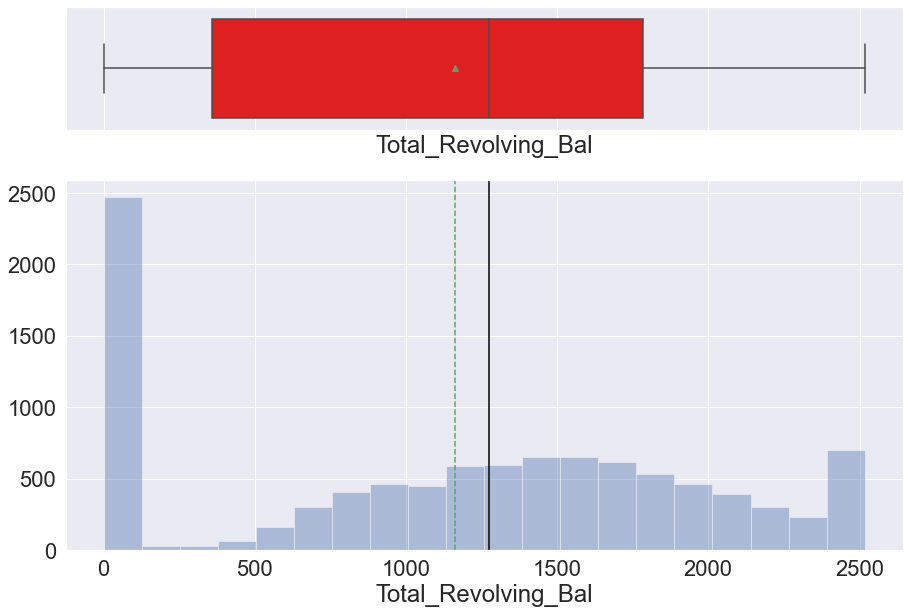

<IPython.core.display.Javascript object>

In [38]:
histogram_boxplot(bank["Total_Revolving_Bal"])

* Many customers (nearly 2500) have a total revolving balance of \$0.

### 3.2.9 - Avg_Open_To_Buy

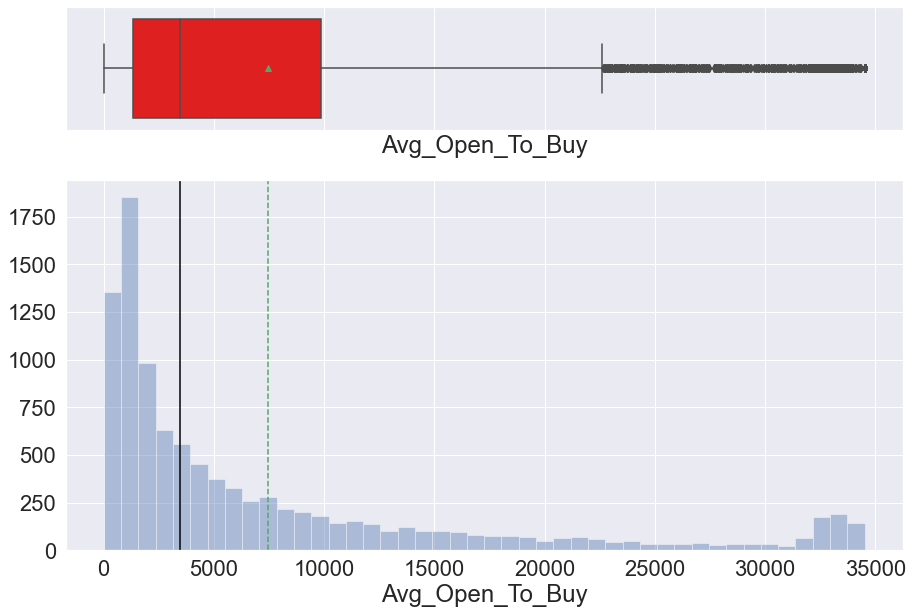

<IPython.core.display.Javascript object>

In [39]:
histogram_boxplot(bank["Avg_Open_To_Buy"])

* Distribution is right-skewed with outliers to the right.

### 3.2.10 - Total_Trans_Amt

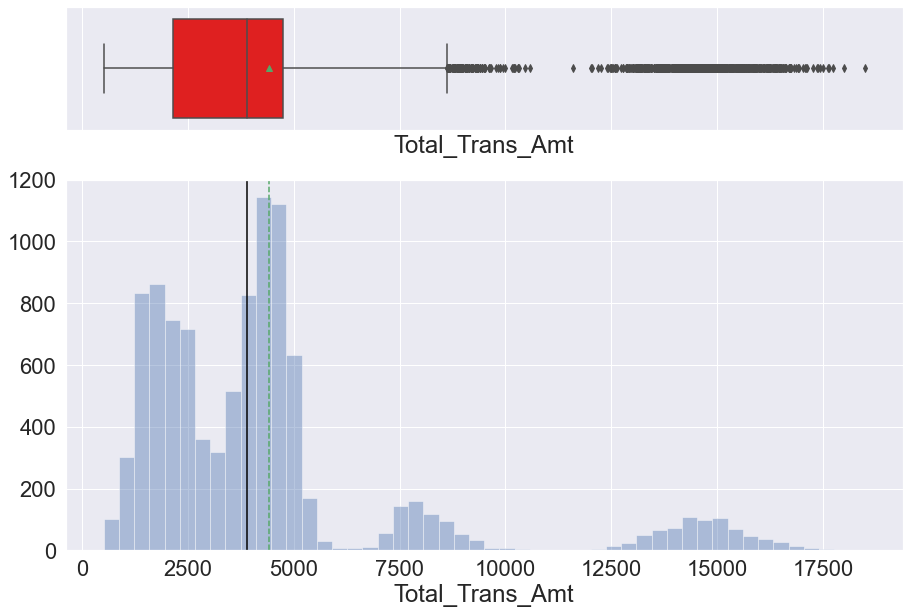

<IPython.core.display.Javascript object>

In [40]:
histogram_boxplot(bank["Total_Trans_Amt"])

* Distribution is right-skewed with outliers to the right.

### 3.2.11 - Total_Trans_Ct

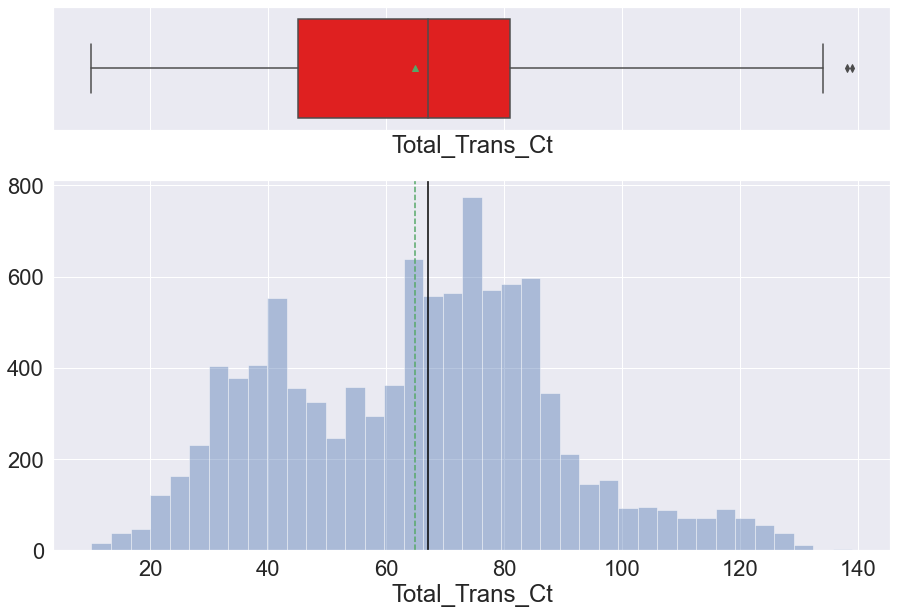

<IPython.core.display.Javascript object>

In [41]:
histogram_boxplot(bank["Total_Trans_Ct"])

* Distribution is slightly right-skewed with outliers to the right.

### 3.2.12 - Total_Ct_Chng_Q4_Q1

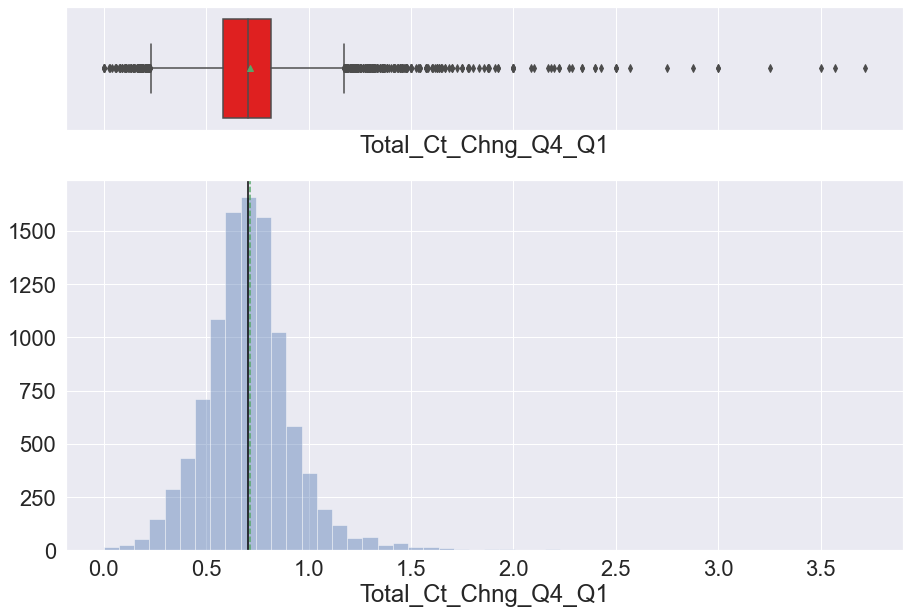

<IPython.core.display.Javascript object>

In [42]:
histogram_boxplot(bank["Total_Ct_Chng_Q4_Q1"])

* Outliers exist on both the left and right sides.

### 3.2.13 - Total_Amt_Chng_Q4_Q1

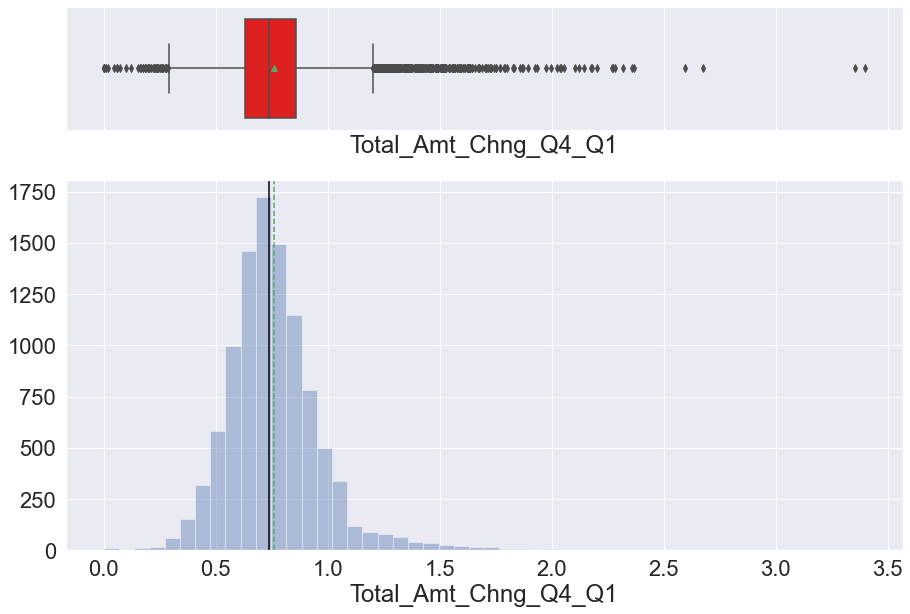

<IPython.core.display.Javascript object>

In [43]:
histogram_boxplot(bank["Total_Amt_Chng_Q4_Q1"])

* Outliers exist on both the left and right.

### 3.2.14 - Avg_Utilization_Ratio

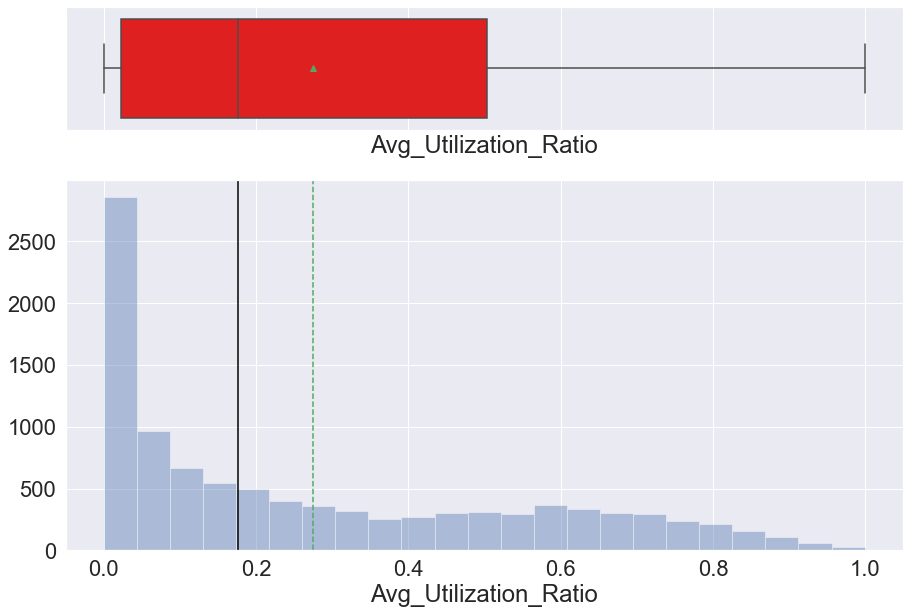

<IPython.core.display.Javascript object>

In [44]:
histogram_boxplot(bank["Avg_Utilization_Ratio"])

* Approx. 2700 have an average utilization ratio of 0.

In [45]:
# Function that creates barplots with percentage displayed over each category.
# Learned/customized from debrief of Project 1 Cardio Good Fitness
def perc_on_bar(plot, feature):
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size=18)
    plt.show()

<IPython.core.display.Javascript object>

### 3.2.15 - Attrition_Flag

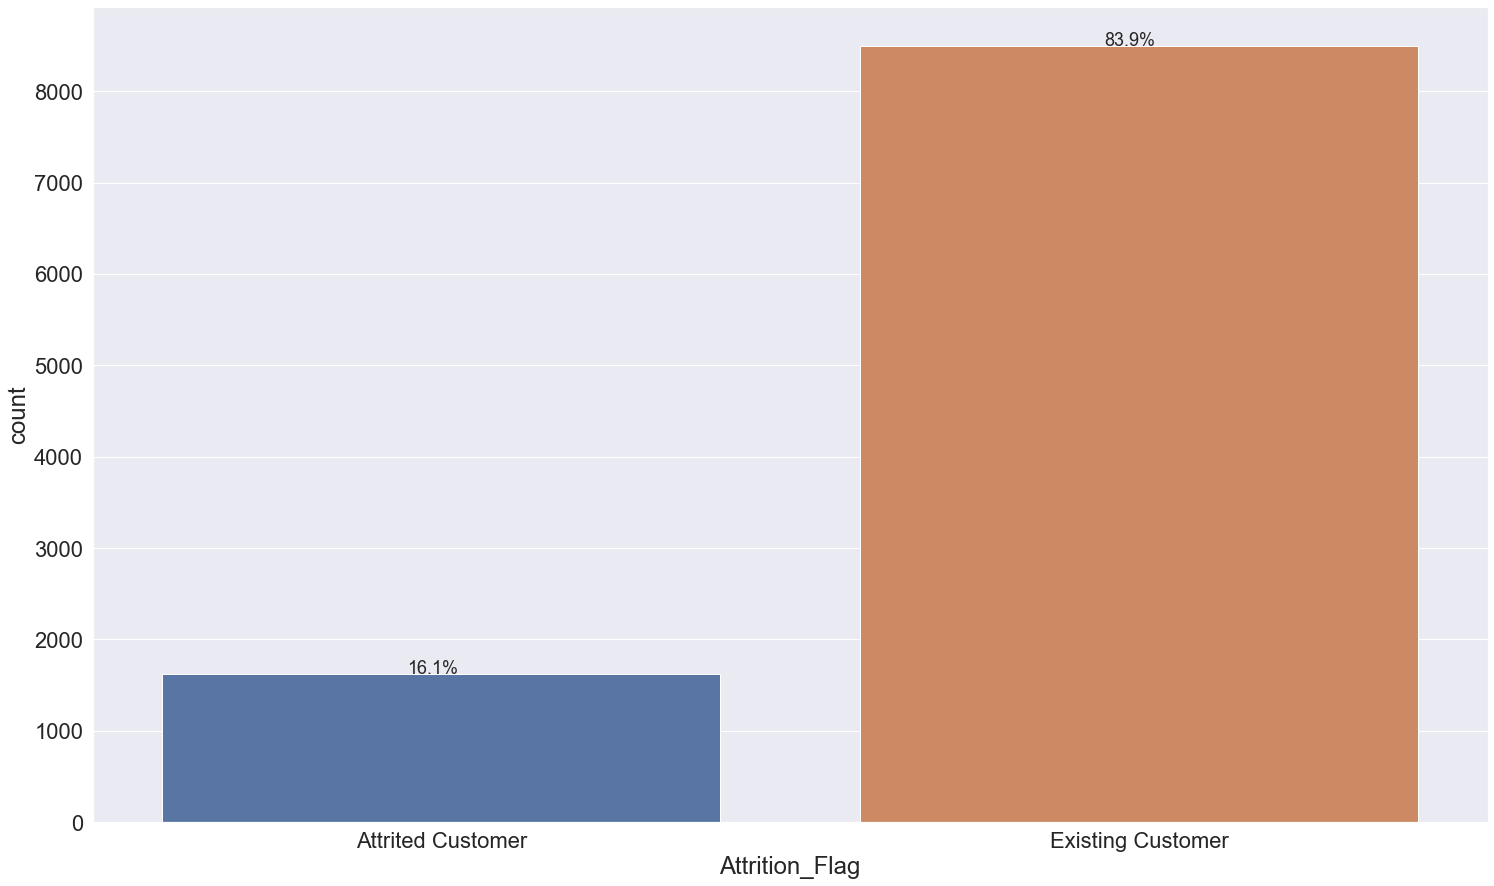

<IPython.core.display.Javascript object>

In [47]:
plt.figure(figsize=(25, 15))
ax = sns.countplot(bank["Attrition_Flag"])
perc_on_bar(ax, bank["Attrition_Flag"])

* By a large margin, most customers are current customers.

### 3.2.16 - Gender

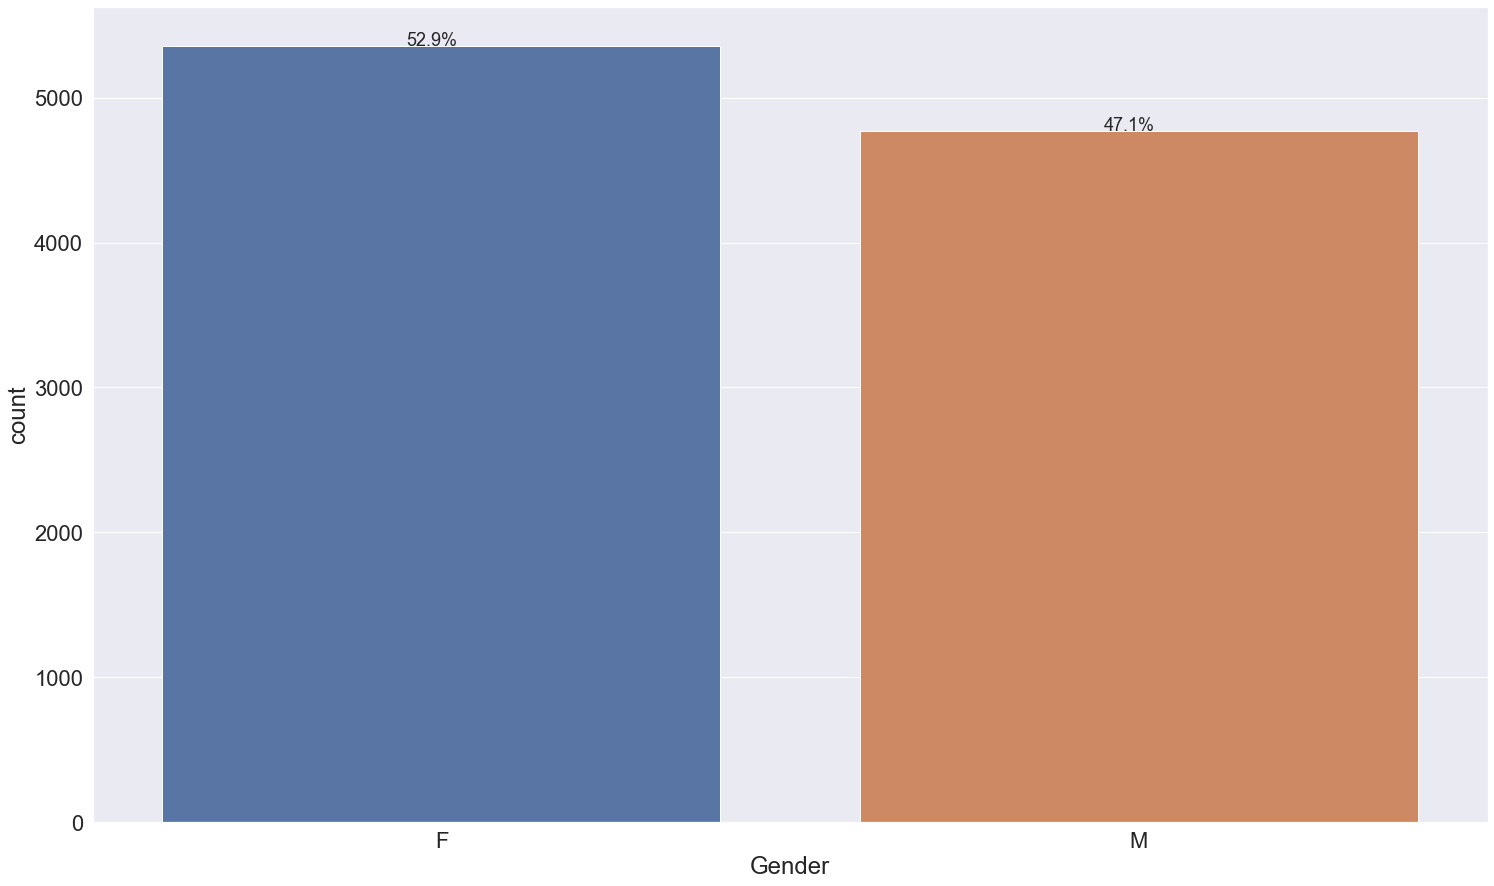

<IPython.core.display.Javascript object>

In [48]:
plt.figure(figsize=(25, 15))
ax = sns.countplot(bank["Gender"])
perc_on_bar(ax, bank["Gender"])

* By a small margin, most customers are female.

### 3.2.17 - Education_Level

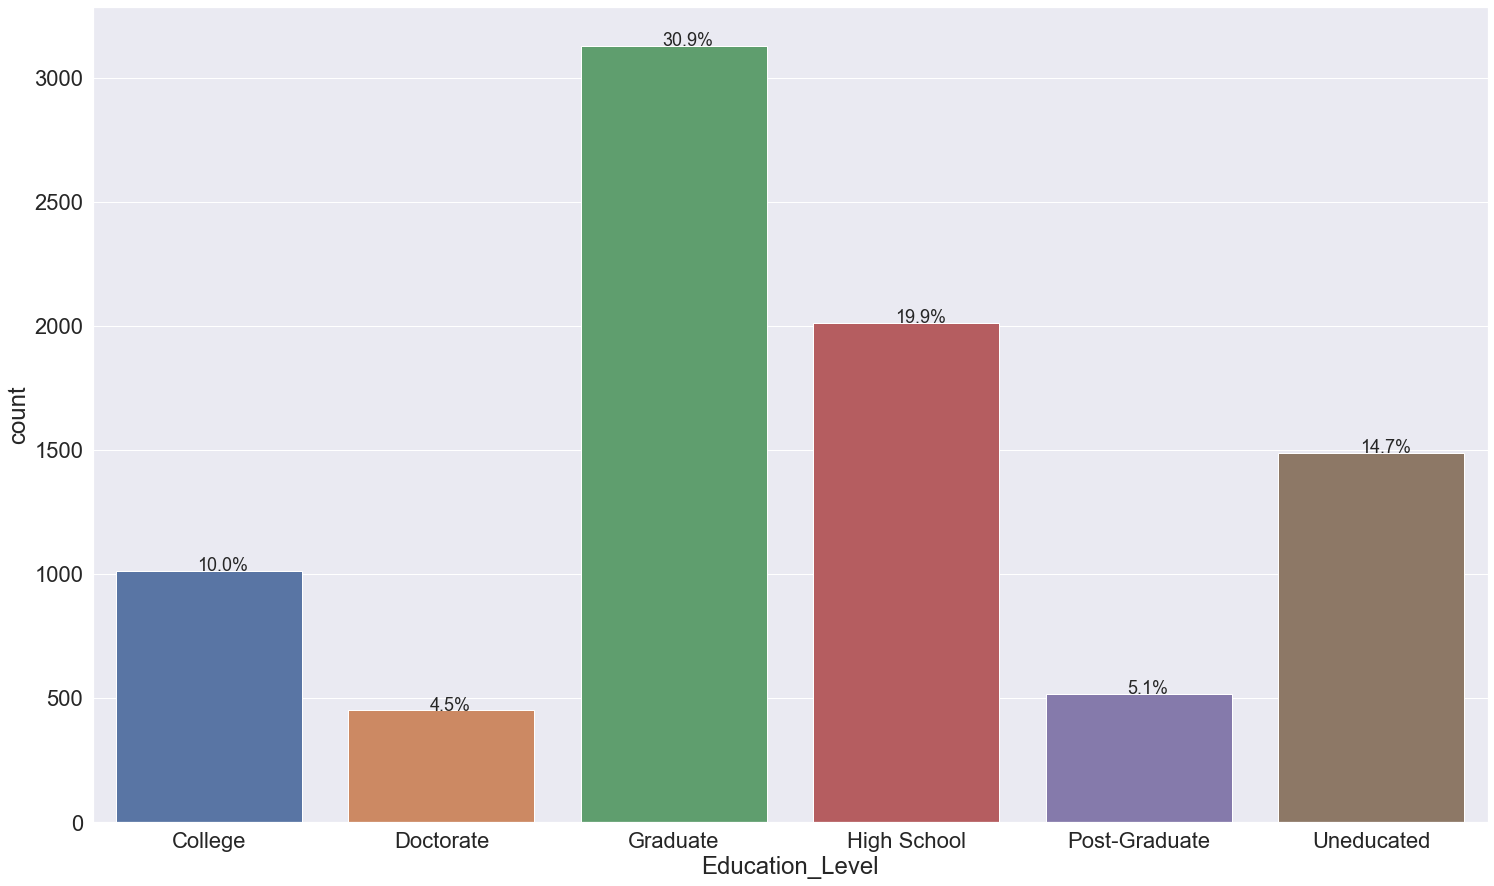

<IPython.core.display.Javascript object>

In [49]:
plt.figure(figsize=(25, 15))
ax = sns.countplot(bank["Education_Level"])
perc_on_bar(ax, bank["Education_Level"])

* Most customers have a graduate degree. 
* More customers are uneducated than have a college degree. 
* Only a small percentage have doctorate degrees or post-graduate education.

### 3.2.18 - Marital_Status

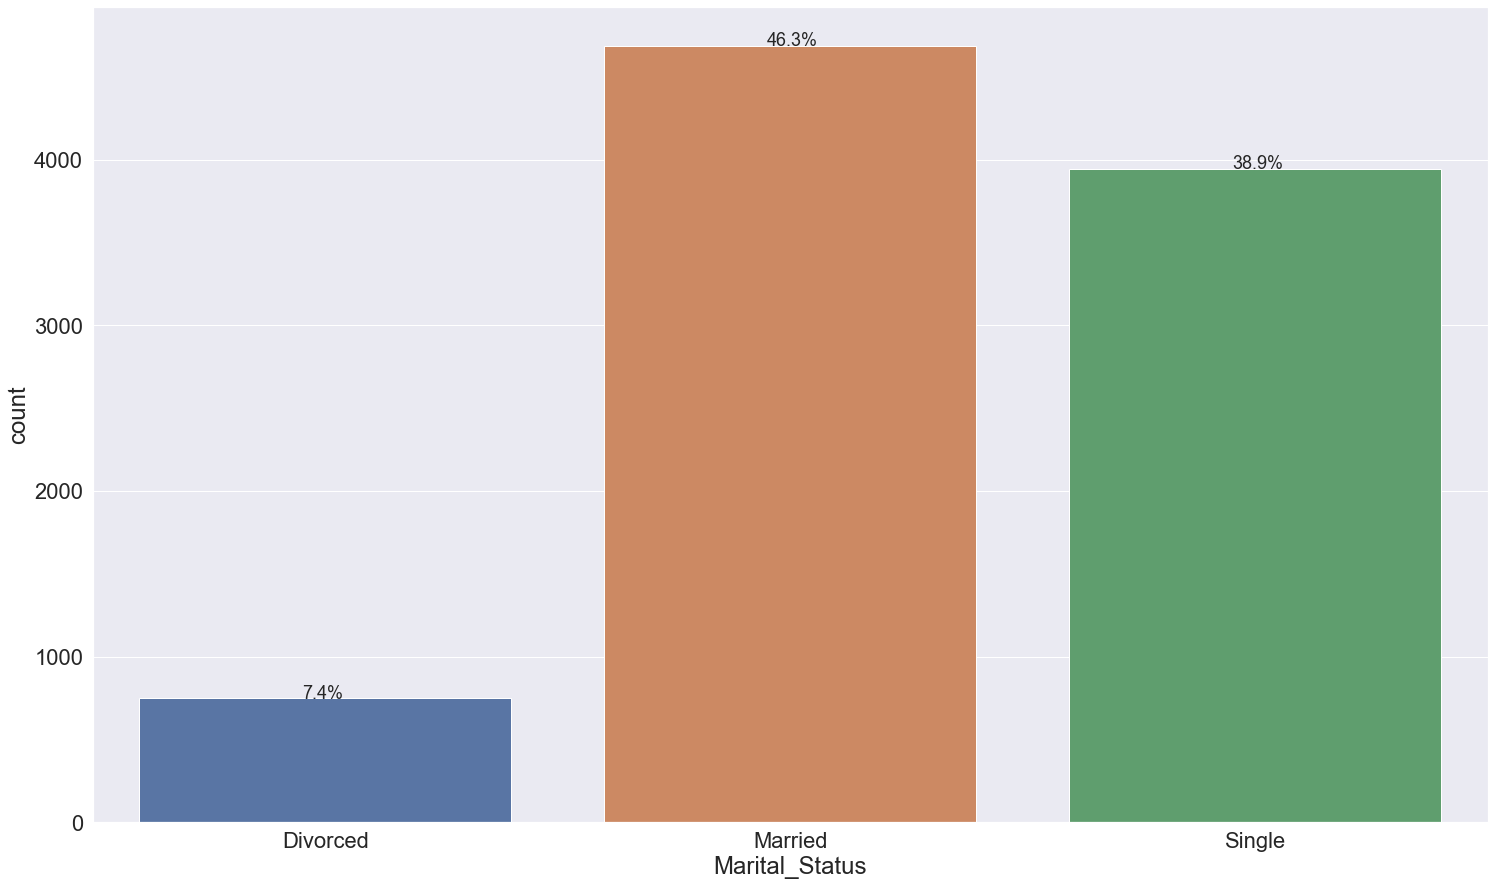

<IPython.core.display.Javascript object>

In [50]:
plt.figure(figsize=(25, 15))
ax = sns.countplot(bank["Marital_Status"])
perc_on_bar(ax, bank["Marital_Status"])

* Most customers are married.
* Only a small percentage of customers are divorced.

### 3.2.19 - Income_Category

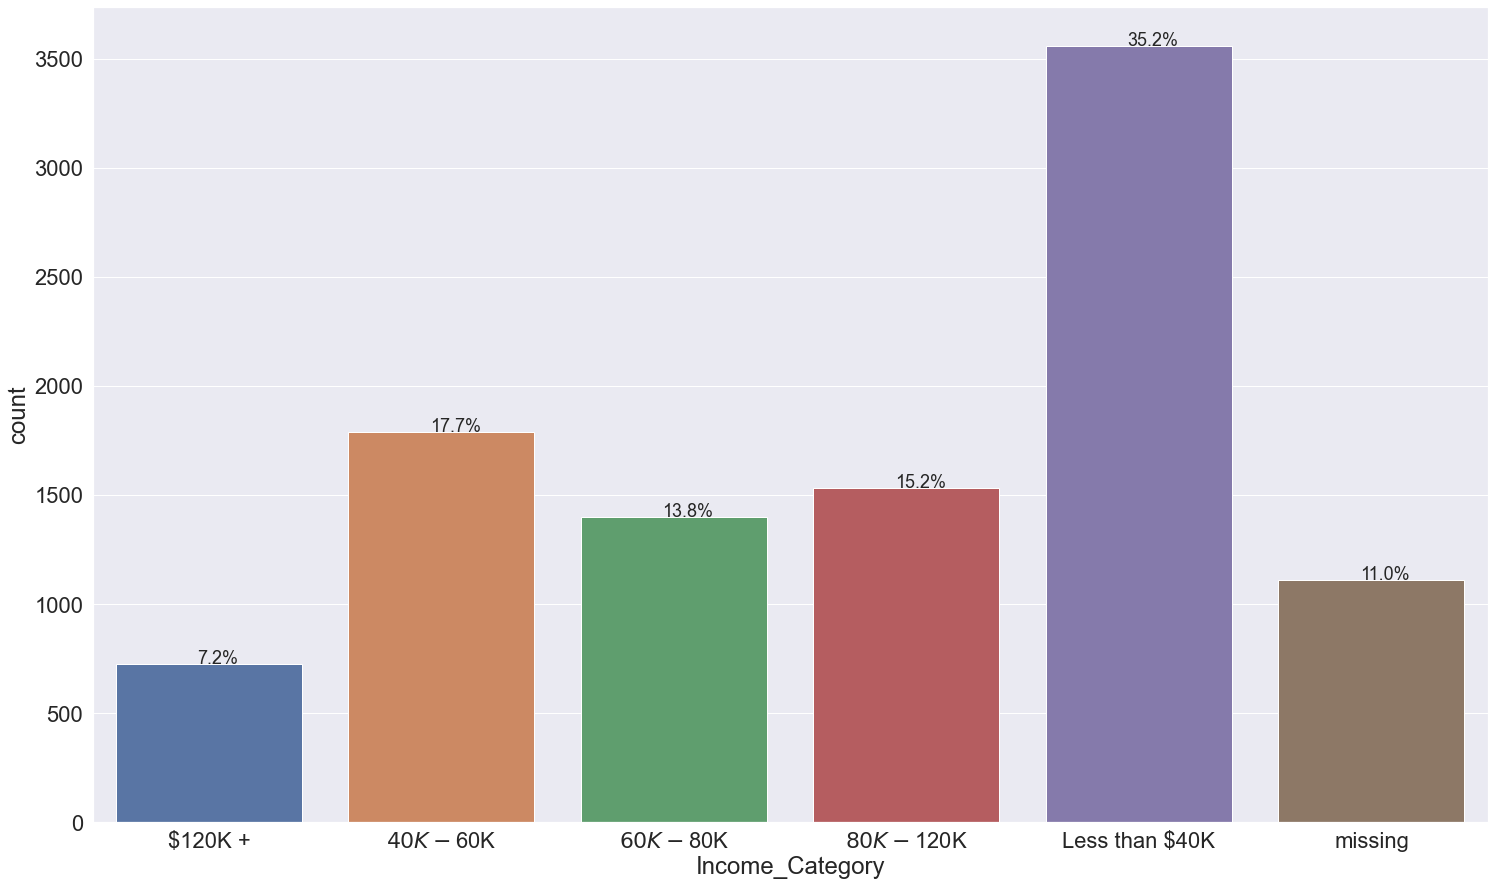

<IPython.core.display.Javascript object>

In [51]:
plt.figure(figsize=(25, 15))
ax = sns.countplot(bank["Income_Category"])
perc_on_bar(ax, bank["Income_Category"])

* By a large margin, most customers earn less than \$40,000.

### 3.2.20 - Card_Category

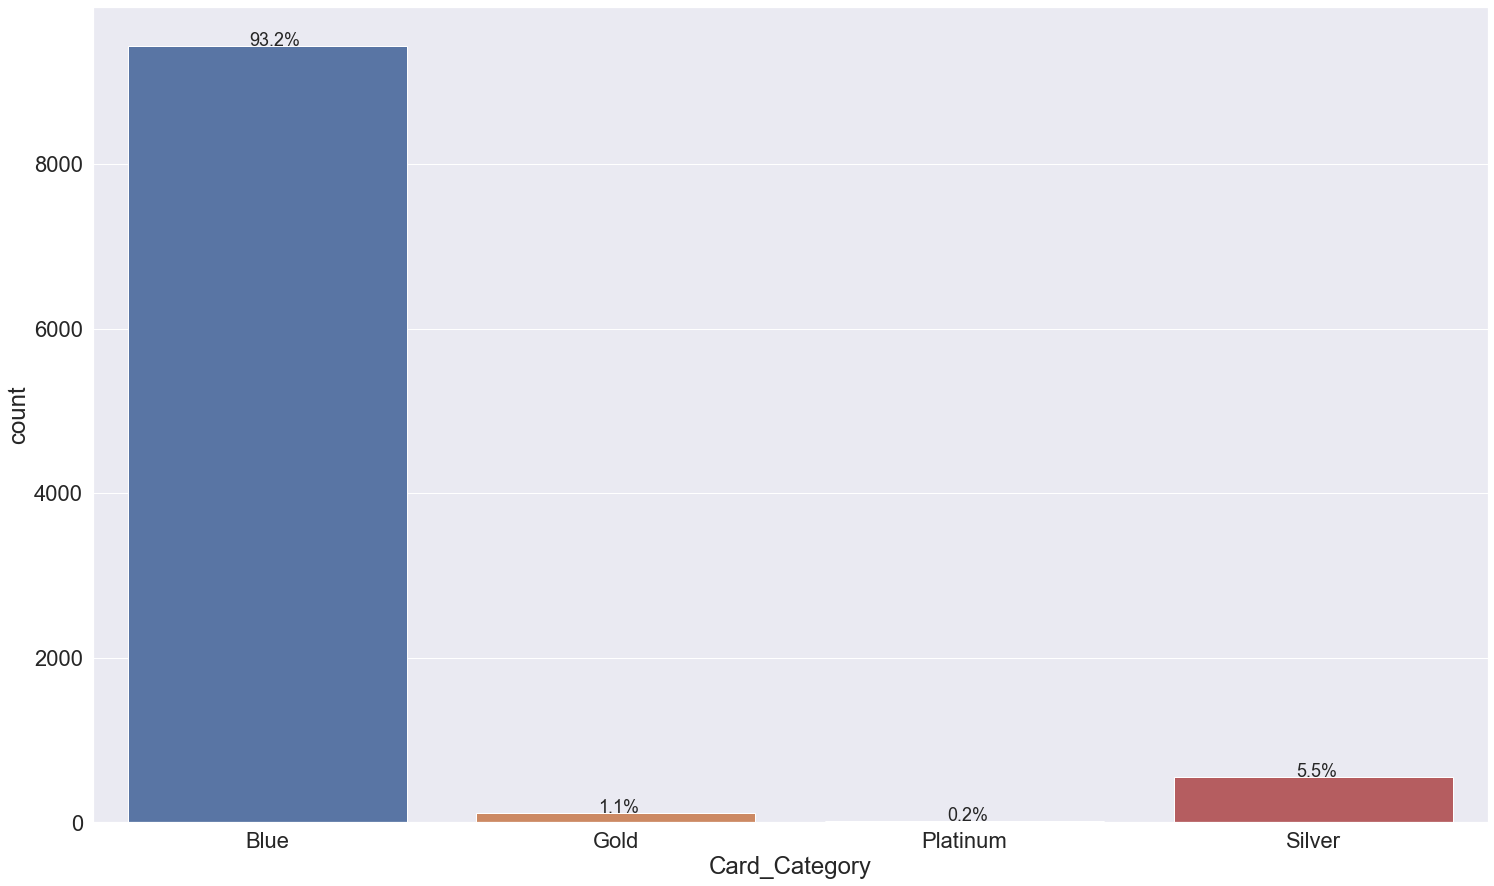

<IPython.core.display.Javascript object>

In [52]:
plt.figure(figsize=(25, 15))
ax = sns.countplot(bank["Card_Category"])
perc_on_bar(ax, bank["Card_Category"])

* By a significant margin, most customers are in the Blue card category.